In [239]:
%run ../datuslib.ipynb

#ROBADO DE LAS NOTE DE CLASES
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn



In [240]:
#CARGO DATASET

C_tweets = pd.read_csv("../Data/train.csv")

In [241]:
#Cambio NaN por Nothing en Keyword
C_tweets['keyword'] = C_tweets['keyword'].fillna('Nothing') 

## Tweets que ponen algún tipo de URL

In [242]:
#Busco filas que contengan www. o http en sus tweets
C_tweets_http = C_tweets.text.str.contains("http", regex =False)
C_tweets_www = C_tweets.text.str.contains("www.", regex =False)

In [243]:
C_tweets_http_www = C_tweets_http | C_tweets_www
C_tweets["Tiene URL"] = C_tweets_http_www

#### Mas de la mitad de los tweets contiene una direccion URL

Text(0, 0.5, 'Tiene URL')

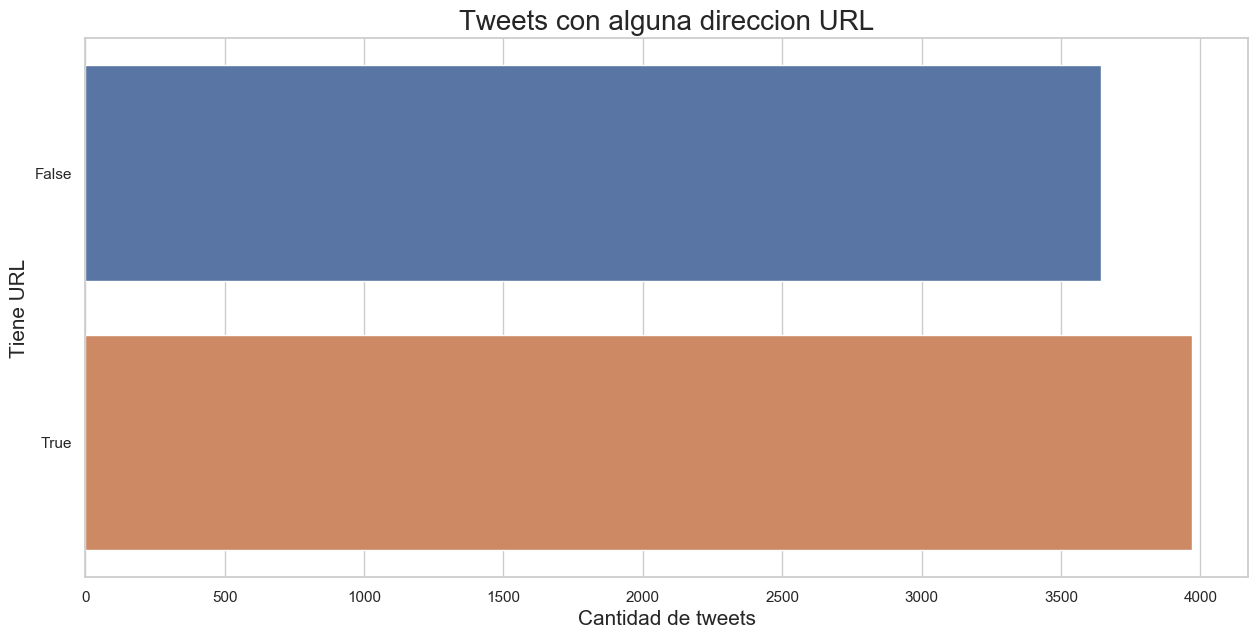

In [244]:
#Area del plot
plt.rcParams['figure.figsize'] = (15, 7)

g = sns.barplot(y = C_tweets["Tiene URL"].value_counts().reset_index()["index"] ,
                x = C_tweets["Tiene URL"].value_counts().reset_index()["Tiene URL"]
                , orient='h')
g.set_title("Tweets con alguna direccion URL", fontsize=20)
g.set_xlabel("Cantidad de tweets", fontsize=15,)
g.set_ylabel("Tiene URL", fontsize=15)

In [245]:
C_URL_Target = C_tweets.groupby(["Tiene URL","target"]).agg({"id":"count"}).rename(columns={"id":"cantidad"}).reset_index()
C_URL_Target["% del subset"] =C_URL_Target["cantidad"] / C_URL_Target["Tiene URL"]\
.transform(lambda x: C_tweets["Tiene URL"].value_counts()[x]) *100
C_URL_Target["% del total"] = C_URL_Target["cantidad"] / C_URL_Target["cantidad"].sum() *100

In [246]:
 C_URL_Target

,Tiene URL,target,cantidad,% del subset,% del total
0,False,0,2543,69.824272,33.403389
1,False,1,1099,30.175728,14.435833
2,True,0,1799,45.303450,23.630632
3,True,1,2172,54.696550,28.530146


Text(0.5, 0, 'Tiene URL')

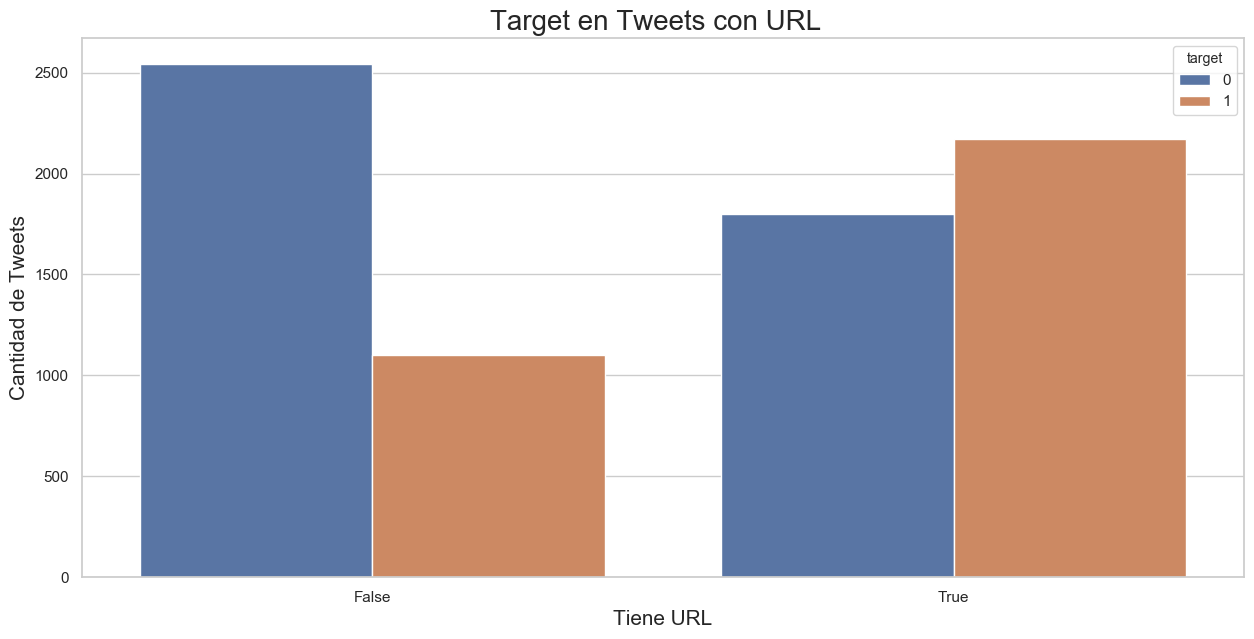

In [247]:
ax = sns.barplot(x="Tiene URL",y="cantidad", hue="target", data=C_URL_Target)
ax.set_title("Target en Tweets con URL  ", fontsize=20)
ax.set_ylabel("Cantidad de Tweets", fontsize=15,)
ax.set_xlabel("Tiene URL", fontsize=15)


#### Como dato no menor, al parecer en los tweets que tiene URL's suelen ser poco mas de la mitad de target = 1 ( 54,7%) y el resto de target 0 (45,3%), 
#### Mientras que los que no tiene URL son mayoria de target 0 (70%) y el resto de target 1 (30%)

## TIPOS DE KEYWORDS EN TWEETS CON URL

In [248]:
#Me quedo solo con los que tienee URL
C_tweets_http_www = C_tweets[C_tweets_http_www]

In [249]:
# Quito "separador" %20 entre keywords, es solo un espacio.
# Por ejemplo, en uno decia natutal%20disaster, lo que seria "natural disater"(toda la frase es la keyword)
# No natural y disaster( por separado, dos key distintas )
C_tweets_http_www['keyword'] = C_tweets_http_www['keyword'].str.replace('%',' ')
C_tweets_http_www['keyword'] = C_tweets_http_www['keyword'].str.replace('2','')
C_tweets_http_www['keyword'] = C_tweets_http_www['keyword'].str.replace('0','')

c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [250]:
#Nueva columna con frecuencia de la key en el nuevo subset
C_tweets_http_www["Frecuencia de Key en subset"] = C_tweets_http_www["keyword"]\
.transform(lambda x: C_tweets_http_www["keyword"].value_counts()[x]) 

c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [251]:
C_tweets_http_www

,id,keyword,location,text,target,Tiene URL,Frecuencia de Key en subset
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,True,24
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,True,24
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,True,24
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,True,24
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,True,24
...,...,...,...,...,...,...,...
7606,10866,Nothing,NaN,Suicide bomber kills 15 in Saudi security site...,1,True,20
7607,10867,Nothing,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1,True,20
7608,10869,Nothing,NaN,Two giant cranes holding a bridge collapse int...,1,True,20
7610,10871,Nothing,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,True,20


### Agrupado Por frecuencia de cada Keyword

In [252]:
C_grouped_FrecDeKey = C_tweets_http_www.groupby(["keyword"]).agg({"Frecuencia de Key en subset":"mean"}).reset_index()

In [253]:
#Chequeo de que la suma de Frecuencias de todas las keywords den igual a la cantidad de tweets con URL
print(C_grouped_FrecDeKey["Frecuencia de Key en subset"].sum() == len(C_tweets_http_www.index))

True


In [254]:
C_grouped_FrecDeKey

,keyword,Frecuencia de Key en subset
0,Nothing,20
1,ablaze,24
2,accident,15
3,aftershock,14
4,airplane accident,21
...,...,...
217,wounded,26
218,wounds,11
219,wreck,11
220,wreckage,33


Text(0.5, 1.0, 'Distribucion de la Frecuencia de keywords en tweets que tienen URL')

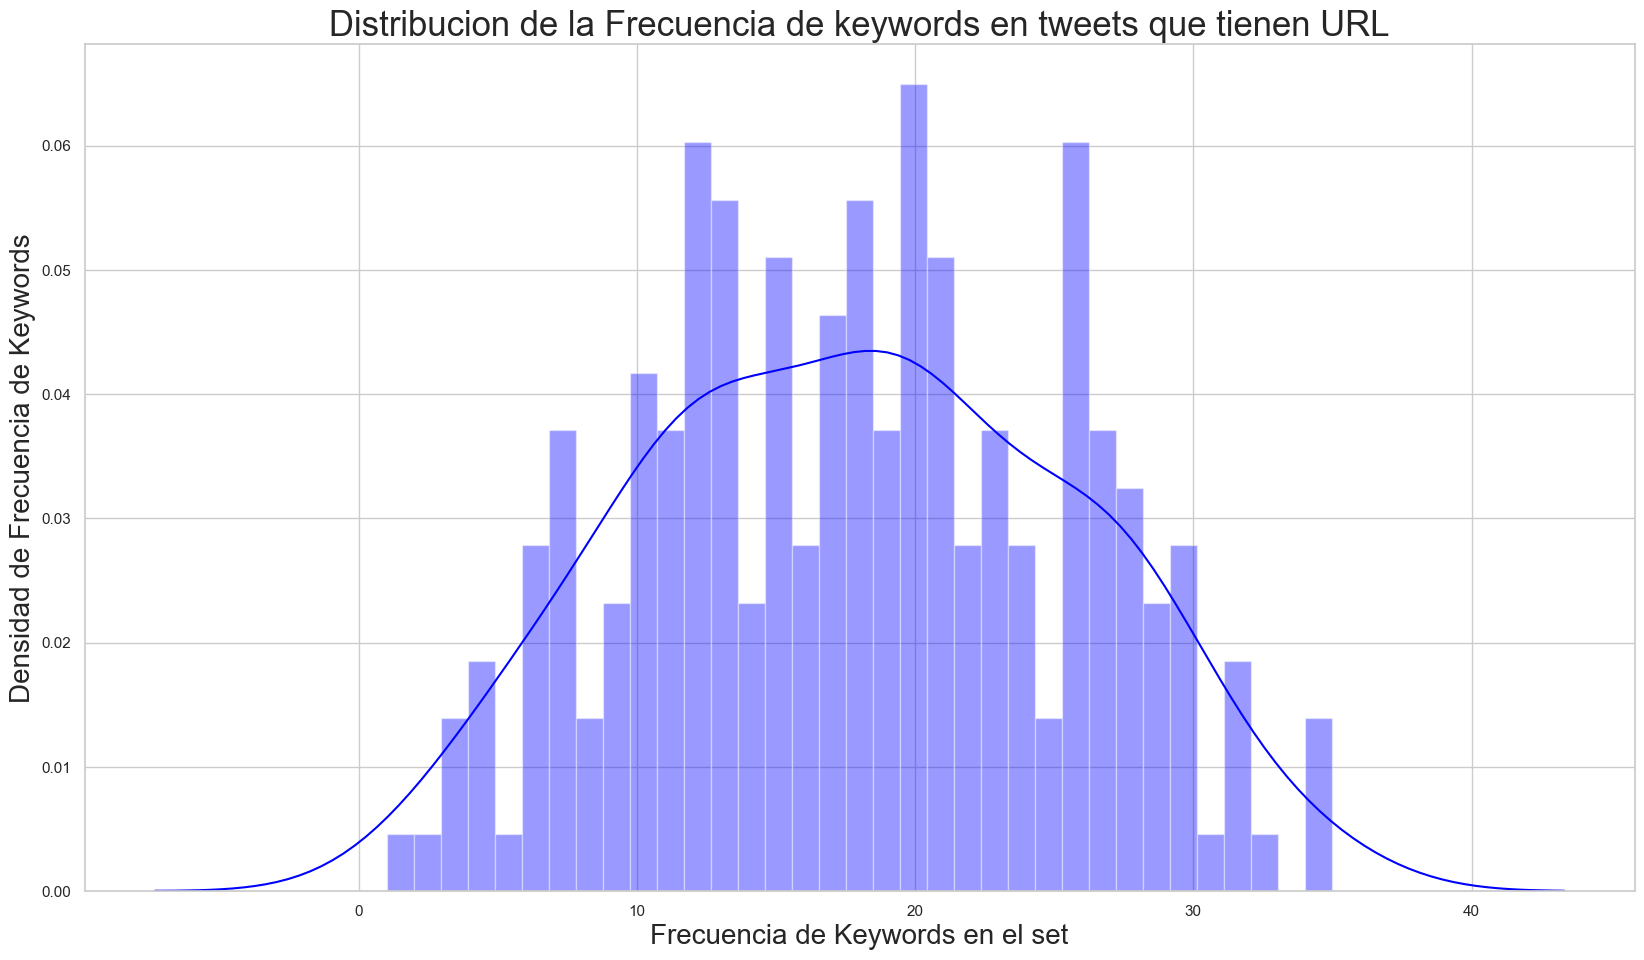

In [255]:
plt.rcParams['figure.figsize'] = (20, 11)
plt.rcParams["axes.labelsize"] = 15
g = sns.distplot(C_grouped_FrecDeKey["Frecuencia de Key en subset"]\
                 ,bins=int(C_grouped_FrecDeKey["Frecuencia de Key en subset"].max()),color='blue')
g.set_ylabel('Densidad de Frecuencia de Keywords', fontsize=20)
g.set_xlabel('Frecuencia de Keywords en el set', fontsize=20)
g.set_title("Distribucion de la Frecuencia de keywords en tweets que tienen URL", fontsize=25)

In [256]:
#sasa =C_tweets_http_www["Frecuencia de Key en subset"].value_counts()\
#.to_frame().reset_index().rename(columns={"index":"Frecuencia de Key","Frecuencia de Key en subset":"Cant tweets"})
#sasa["Cant de Keywords con esta Frecuencia"] = sasa["Cant tweets"] / sasa["Frecuencia de Key"]

### Por ahora (HASTA ACHICAR KEYWORDS) y para achicar datos, elijo los tweets que tienen una frecuencia de keyword menores o iguales a 10 (en este subset, de tweets con URL). Para Mostrar la frecuencia de keyword en los tweets que tienen URL's y hacer un TOP

In [257]:
C_tweets_URL_acotado_por_key =  C_tweets_http_www[C_tweets_http_www["Frecuencia de Key en subset"]<=10]\
.groupby("keyword").agg({"Frecuencia de Key en subset":"mean"}).reset_index()\
.sort_values(by='Frecuencia de Key en subset', ascending=False)

In [258]:
len(C_tweets_URL_acotado_por_key["keyword"].value_counts())

41

Text(0.5, 1.0, 'Keywords menos usados(frecuencia <= 10) en Tweets con URL')

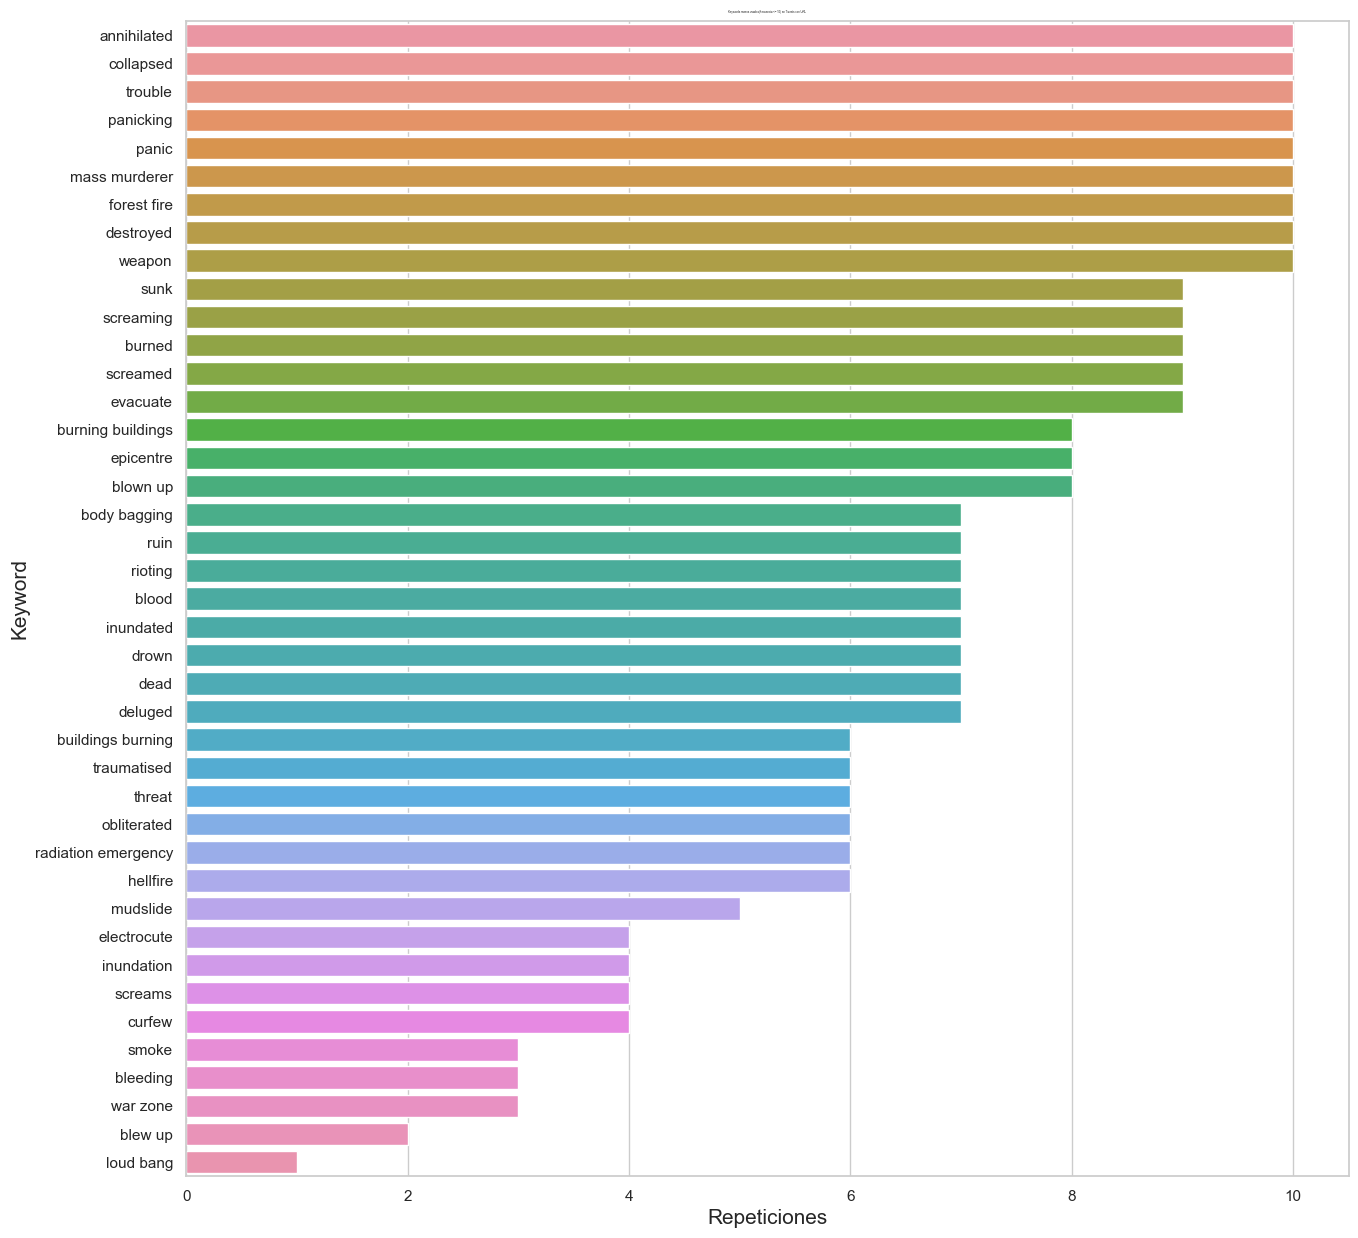

In [259]:
plt.rcParams['figure.figsize'] = (15, 15)

ax = sns.barplot(x="Frecuencia de Key en subset", y="keyword", data=C_tweets_URL_acotado_por_key,orient='h')

ax.set_ylabel('Keyword', fontsize=15)
ax.set_xlabel('Repeticiones', fontsize=15)
ax.set_title("Keywords menos usados(frecuencia <= 10) en Tweets con URL", fontsize=2)

### Hago lo mismo que con los menos tweeteados, pero esta vez con los que la frecuencia de la keyword sea mayor o igual a 30.

In [260]:
C_tweets_URL_acotado_por_key =  C_tweets_http_www[C_tweets_http_www["Frecuencia de Key en subset"]>=30]\
.groupby("keyword").agg({"Frecuencia de Key en subset":"mean"}).reset_index()\
.sort_values(by='Frecuencia de Key en subset', ascending=False)

In [261]:
len(C_tweets_URL_acotado_por_key["keyword"].value_counts())

15

Text(0.5, 1.0, 'Keywords mas usados(frecuencia >= 30) en Tweets con URL')

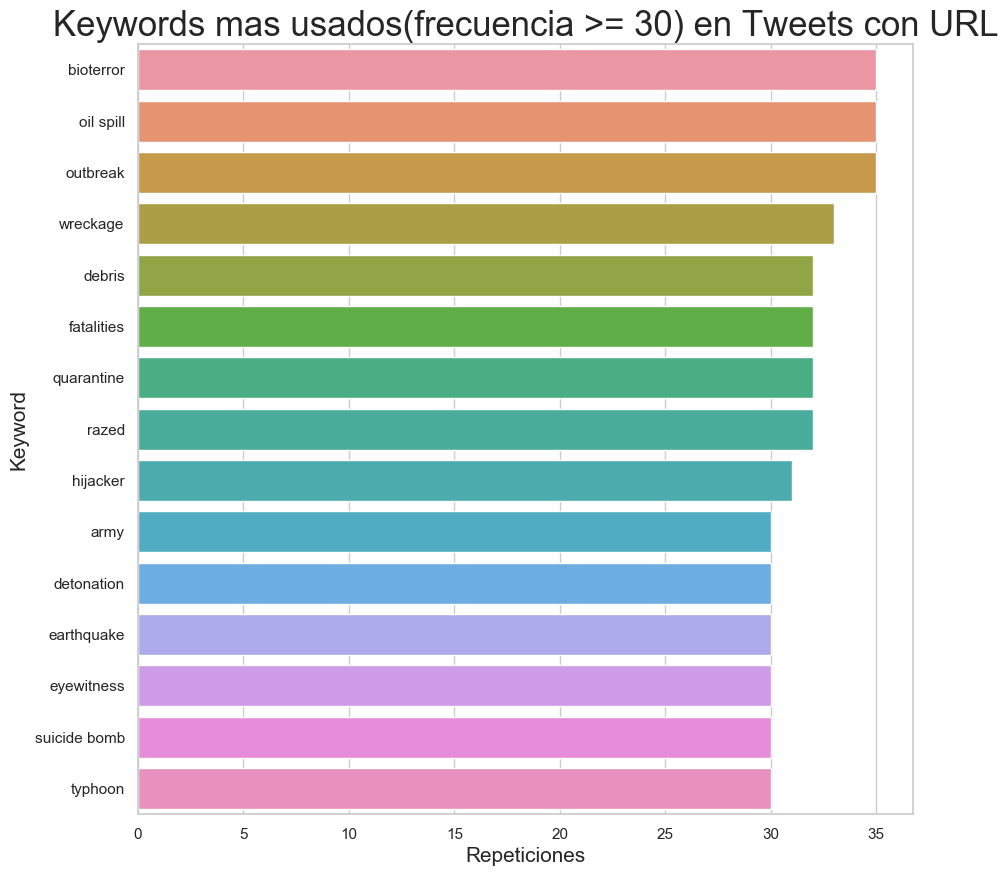

In [262]:
plt.rcParams['figure.figsize'] = (10, 10)

ax = sns.barplot(x="Frecuencia de Key en subset", y="keyword", data=C_tweets_URL_acotado_por_key,orient='h')

ax.set_ylabel('Keyword', fontsize=15)
ax.set_xlabel('Repeticiones', fontsize=15)
ax.set_title("Keywords mas usados(frecuencia >= 30) en Tweets con URL", fontsize=25)

### El resto de los keywords se concentran en frecuencias de 10 a 30, obviamente.

In [263]:

C_tweets_URL_acotado_por_key = C_tweets_http_www[C_tweets_http_www["Frecuencia de Key en subset"]<30]

C_tweets_URL_acotado_por_key = C_tweets_URL_acotado_por_key[C_tweets_URL_acotado_por_key["Frecuencia de Key en subset"]>10]\
.groupby("keyword").agg({"Frecuencia de Key en subset":"mean"}).reset_index()\
.sort_values(by='Frecuencia de Key en subset', ascending=False)

In [264]:
len(C_tweets_URL_acotado_por_key["keyword"].value_counts())

166

### Pero la mayor concentracion se encuentra masomenos entre los de Frecuencia de 10 a 20

In [265]:

C_tweets_URL_acotado_por_key = C_tweets_http_www[C_tweets_http_www["Frecuencia de Key en subset"]<=20]

C_tweets_URL_acotado_por_key = C_tweets_URL_acotado_por_key[C_tweets_URL_acotado_por_key["Frecuencia de Key en subset"]>10]\
.groupby("keyword").agg({"Frecuencia de Key en subset":"mean"}).reset_index()\
.sort_values(by='Frecuencia de Key en subset', ascending=False)

In [266]:
len(C_tweets_URL_acotado_por_key["keyword"].value_counts())

99